<a href="https://colab.research.google.com/github/azarcoder/pytorch_udemy/blob/main/custom_image_dataset_loader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Custom Image Dataset Loader

In [1]:
import torch
import os
from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader


In [ ]:
#upload our dataset here
from google.colab import files
uploaded = files.upload()

Saving classification_dataset_v3_sm.rar to classification_dataset_v3_sm.rar


In [ ]:
!apt-get install unrar


In [ ]:
#unzip
!unrar x /content/classification_dataset_v3_sm.rar

In [ ]:
root_dir = '/content/classification_dataset_v3_sm/images/train'
for label, class_dir in enumerate(os.listdir(root_dir)):
  print('label:', label, 'class:',class_dir)

label: 0 class: Person
label: 1 class: Dog
label: 2 class: Cat


In [ ]:
#boiler plate code
class ImageDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.image_paths = []
        self.labels = []
        self.class_name = {}
        self.transform = transform

        for label, class_dir in enumerate(os.listdir(root_dir)):
          self.class_name[label] = class_dir
          class_path = os.path.join(root_dir, class_dir)
          #get all image from particular class
          for img_name in os.listdir(class_path):
            self.image_paths.append(os.path.join(class_path, img_name))
            self.labels.append(label)

    def __len__(self):
      return len(self.image_paths)

    def __getitem__(self, idx):
      img_path = self.image_paths[idx]
      label = self.labels[idx]
      image = Image.open(img_path).convert('RGB')
      if self.transform:
        image = self.transform(image)

      return image, label


In [ ]:
transform = transforms.Compose([
    transforms.Resize((128, 128)), #image size
    transforms.ToTensor()])

In [ ]:
train_img_dir = '/content/classification_dataset_v3_sm/images/train'
test_img_dir = '/content/classification_dataset_v3_sm/images/test'

train_img_dataset = ImageDataset(train_img_dir, transform=transform)
test_img_dataset = ImageDataset(test_img_dir, transform=transform)

In [ ]:
train_img_loader = DataLoader(dataset=train_img_dataset, batch_size=32, shuffle=True)
test_img_loader = DataLoader(dataset=test_img_dataset, batch_size=32, shuffle=True)

In [ ]:
for images, labels in train_img_loader:
  print(images.shape, labels.shape)
  break

torch.Size([32, 3, 128, 128]) torch.Size([32])


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
print(train_img_dataset.class_name, test_img_dataset.class_name)

{0: 'Person', 1: 'Dog', 2: 'Cat'} {0: 'Person', 1: 'Dog', 2: 'Cat'}


torch.Size([32, 3, 128, 128]) torch.Size([32])
(3, 128, 128)
Dog
1


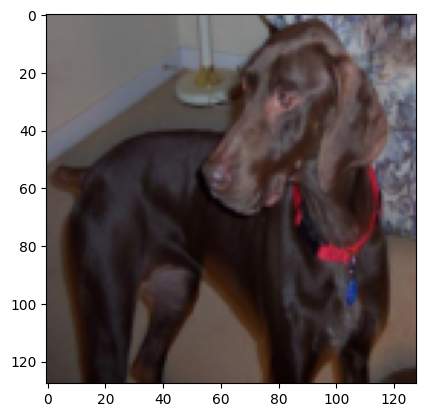

In [ ]:
for images, label in train_img_loader:
  print(images.shape, labels.shape)
  img = images[0].numpy()
  print(img.shape)
  label = labels[0].item()
  print(train_img_dataset.class_name[label])
  img = np.transpose(img, (1, 2, 0))
  print(label)
  plt.imshow(img,vmin =0 , vmax = 255)
  plt.show()
  break